In [155]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

In [156]:
customers_df = pd.read_csv(r'/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/raw/archive/customers.csv')
customers_df

,id,gender,age,number_of_kids
0,979863,MALE,26,2
1,780123,MALE,60,2
2,614848,MALE,45,4
3,775046,MALE,62,3
4,991601,MALE,23,0
...,...,...,...,...
2495,208889,FEMALE,18,0
2496,385802,FEMALE,25,0
2497,990291,MALE,71,0
2498,285058,MALE,28,4


Shape of your Data Set loaded: (2500, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


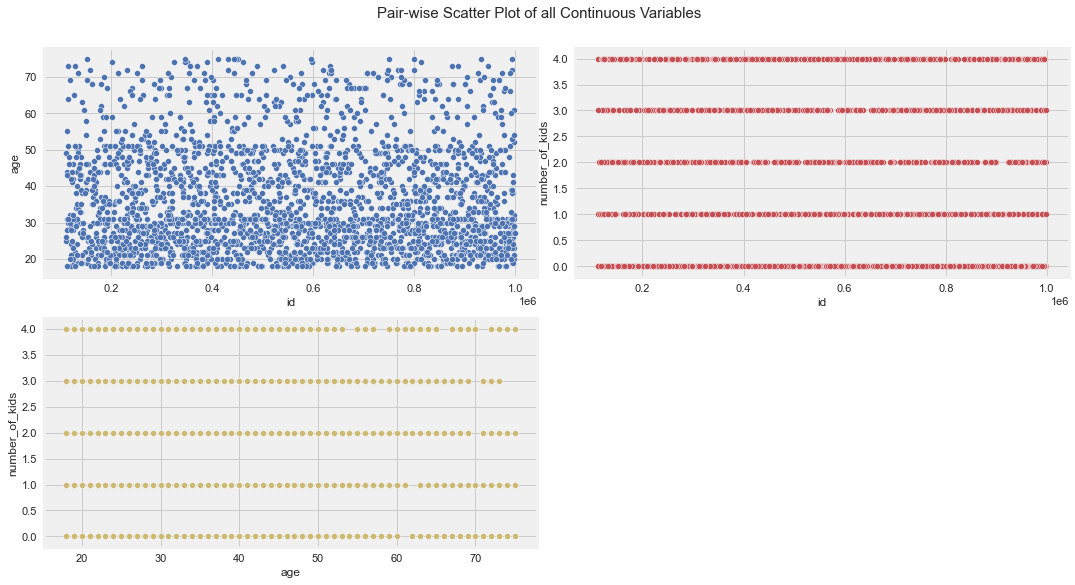

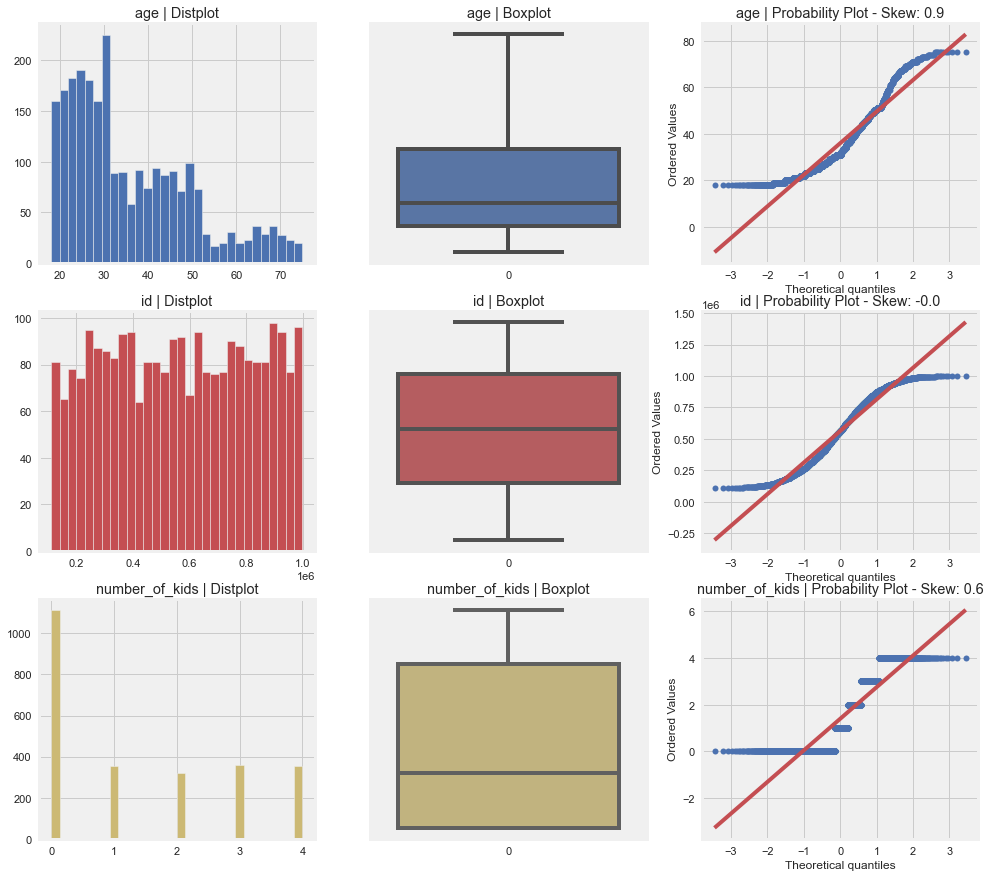

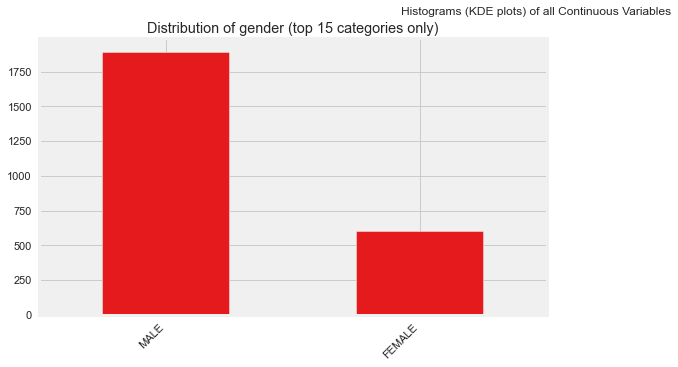

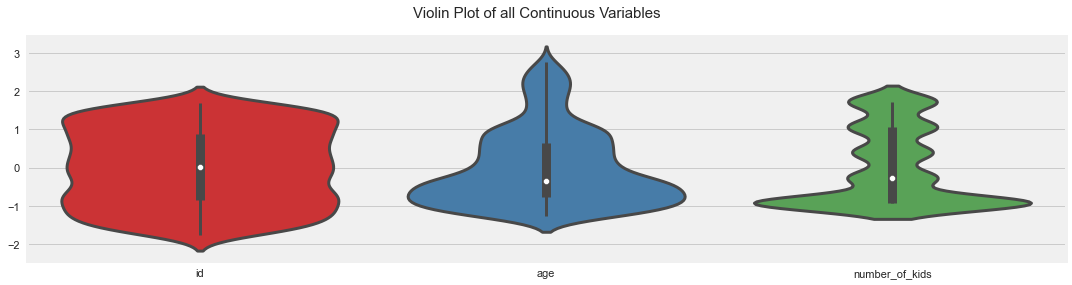

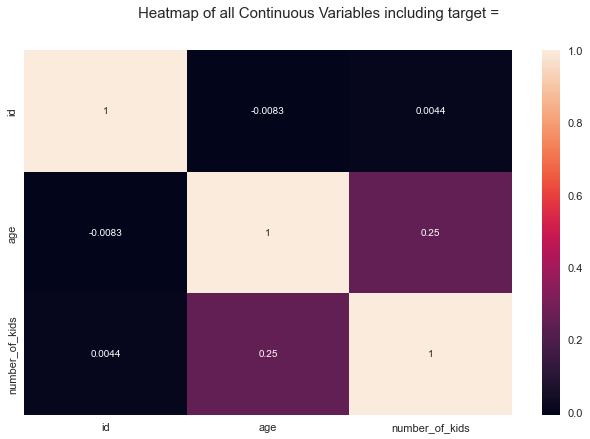

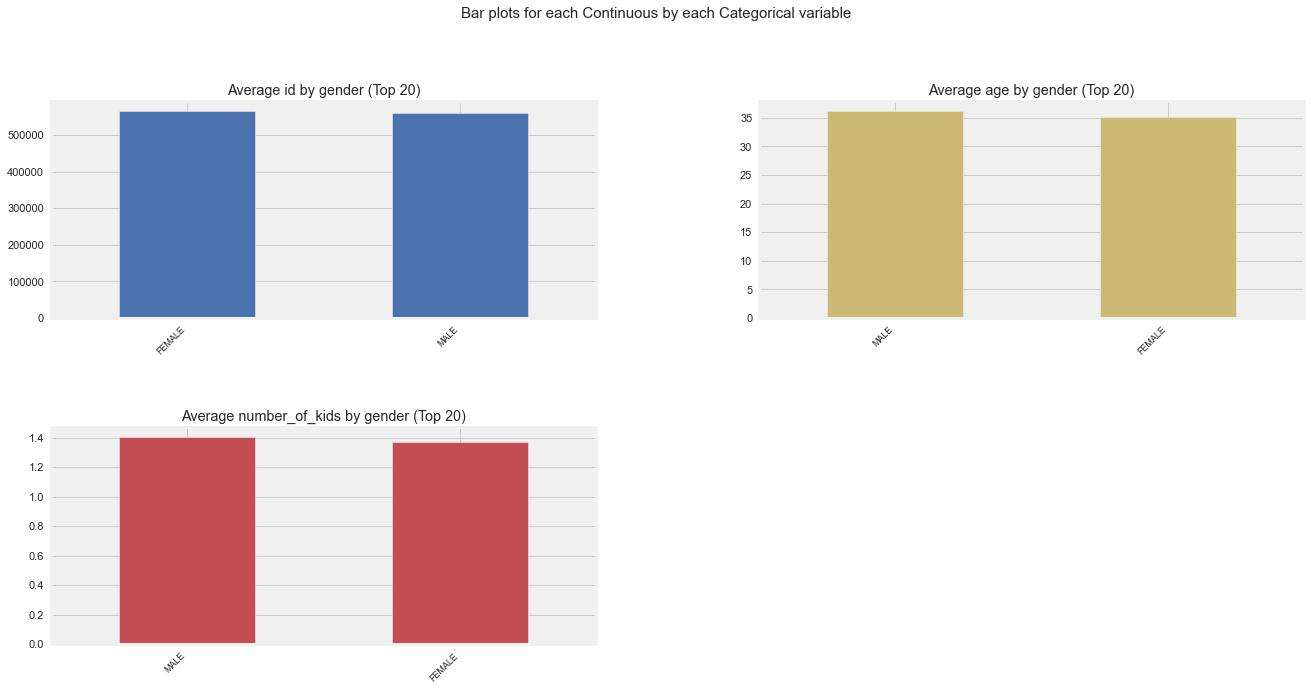

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [157]:
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
autoviz = AutoViz_Class().AutoViz(filename = None,
    sep=",",
    depVar="",
    dfte=customers_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

As we can see from the age distribution plot, most users are less than 30 years old, the next category is 30 to 50, and the last one is >50.

From the Q-Q age plot, we see that the distribution is not normal.

The number of kids tells us that the bigger category doesn't have kids. But having 1, 2, 3, or 4 kids is happening almost equally often.

The most of users are males.

Age and number of kids correlate not too strongly.

An average age by gender and an average number of kids by gender are almost equal between males and females.

In [158]:
train_df = pd.read_csv(r'/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/processed/train.csv')
train_df

,id,date,online_hours
0,111556,2017-05-31,2.2
1,111556,2017-06-01,2.5
2,111556,2017-06-02,0.0
3,111556,2017-06-03,0.0
4,111556,2017-06-04,4.7
...,...,...,...
54555,998229,2017-06-17,4.9
54556,998229,2017-06-18,6.5
54557,998229,2017-06-19,9.2
54558,998229,2017-06-20,0.0


In [159]:
test_df = pd.read_csv(r'/Users/nadiiapoliakovska/Documents/Springboard/Users_active_time_prediction/data/processed/test.csv')
test_df

,id,date,online_hours
0,979863,2017-06-28,7
1,979863,2017-06-27,9
2,979863,2017-06-26,9
3,979863,2017-06-25,10
4,979863,2017-06-24,9
...,...,...,...
17495,165666,2017-06-26,7
17496,165666,2017-06-25,7
17497,165666,2017-06-24,10
17498,165666,2017-06-23,6


Shape of your Data Set loaded: (54560, 3)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set


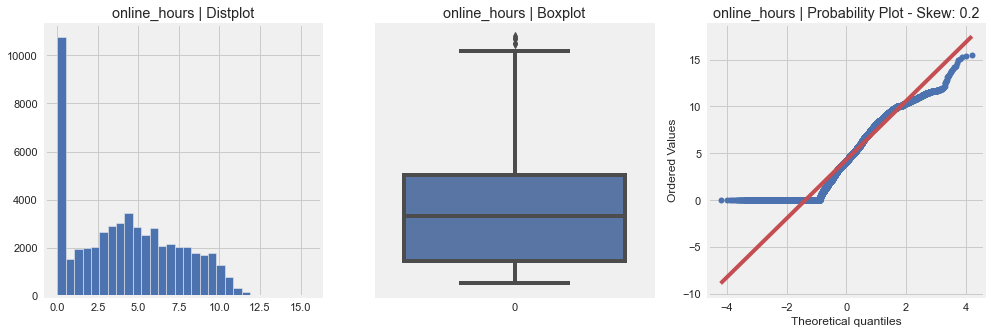

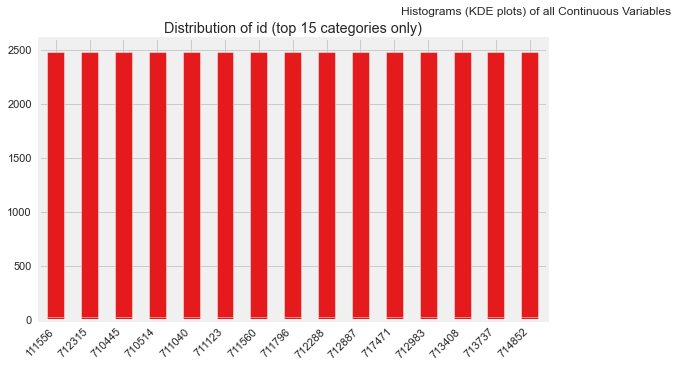

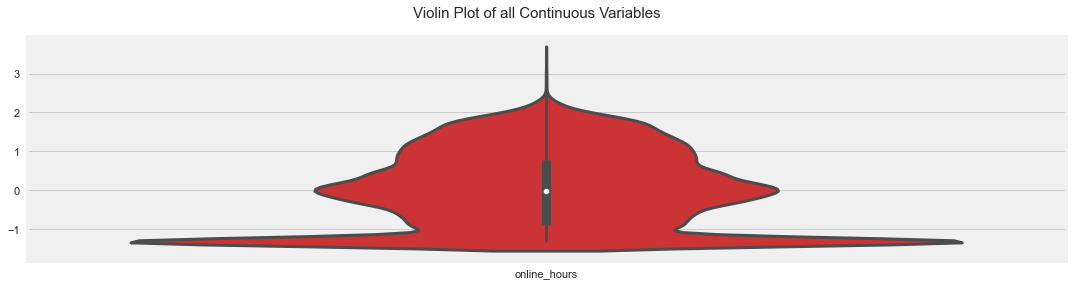

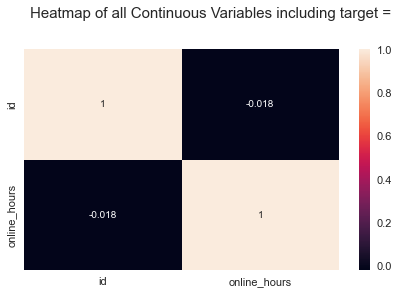

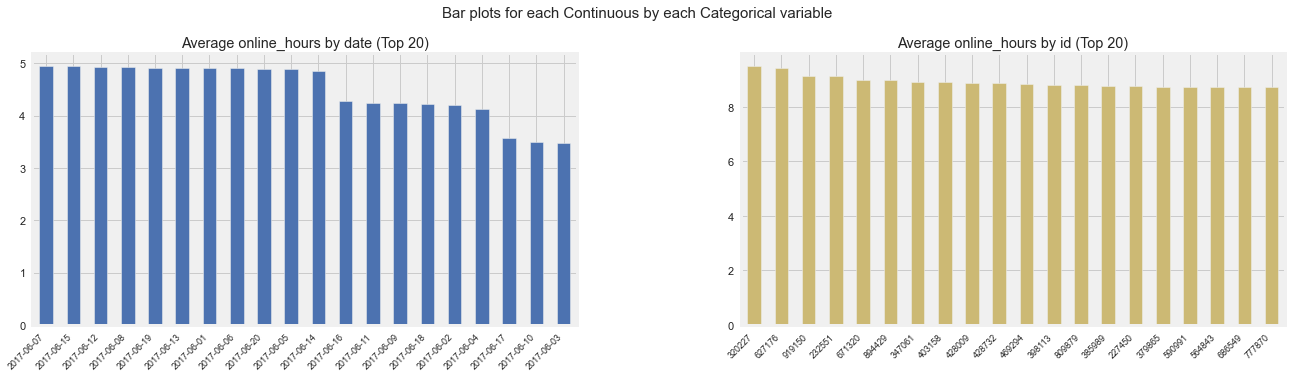

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [160]:
autoviz = AutoViz_Class().AutoViz(filename = None,
    sep=",",
    depVar="",
    dfte=train_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

As we see from train_df plots, online hours distribution is not normal.

Shape of your Data Set loaded: (17500, 3)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


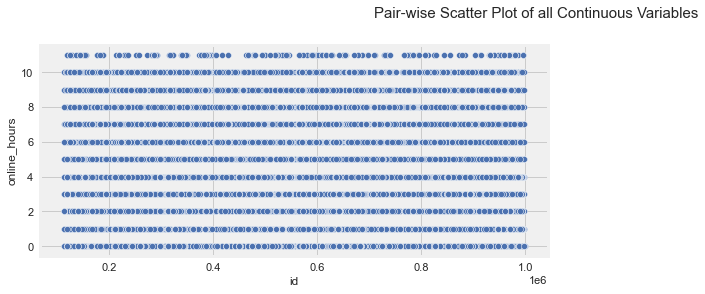

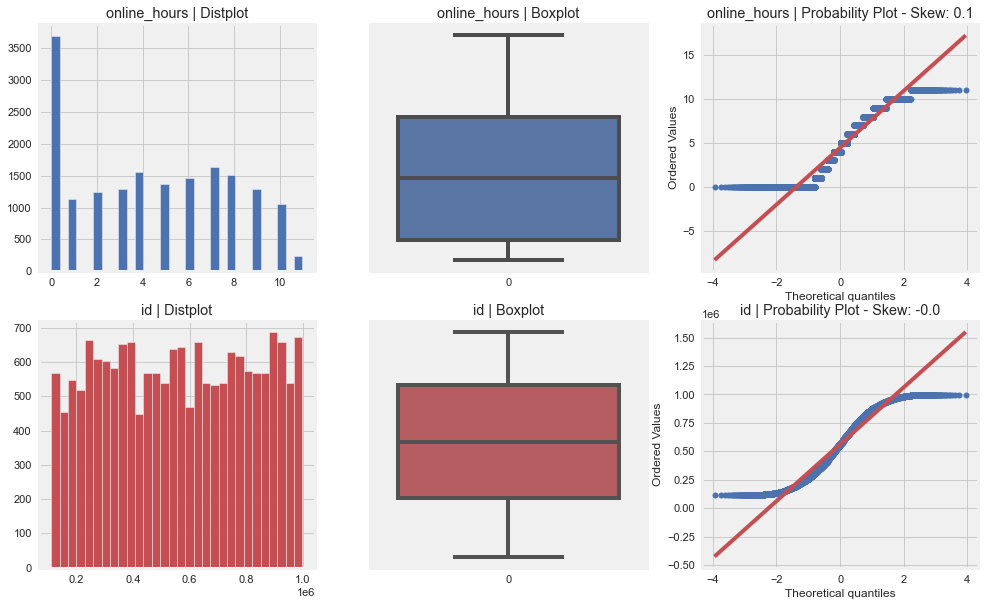

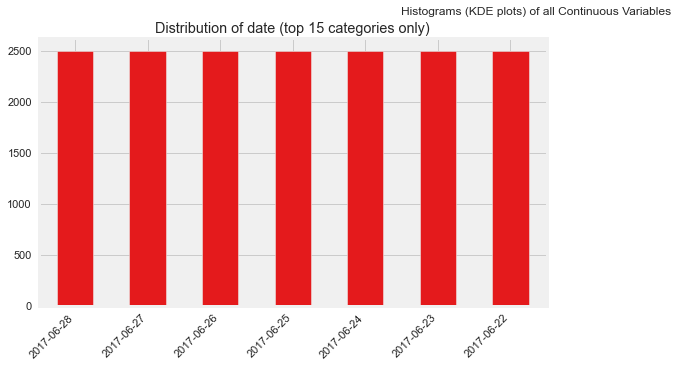

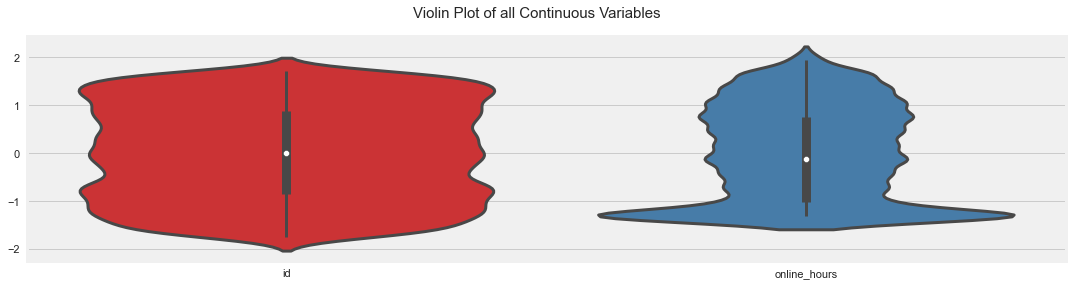

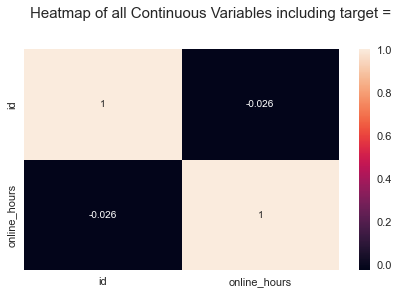

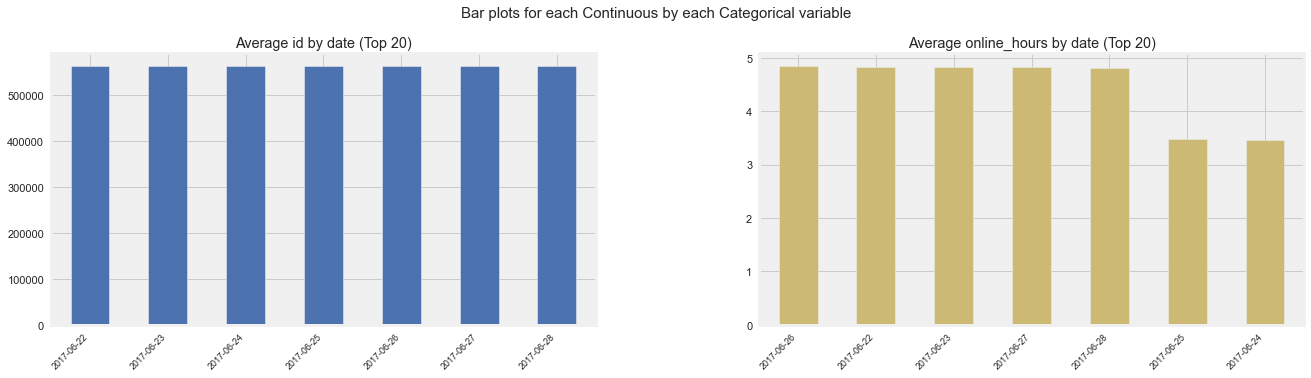

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [161]:
autoviz = AutoViz_Class().AutoViz(filename = None,
    sep=",",
    depVar="",
    dfte=test_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

And online hours distribution in test_df plots is not normal too.